# Evaluation

In [29]:
import os
import re
import import_ipynb
import numpy as np
import pandas as pd
from tqdm import tqdm
from pprint import pprint
from utils import WAM, BN, SVM
from functools import reduce
from IPython.display import display
from sklearn.metrics import confusion_matrix

- 性能指标的计算公式

$Sensitivity(Recall) = \frac{TP}{TP+FN}$

$Specificity = \frac{TN}{TN+FP}$

$Tpr = \frac{TP}{TP+FN}$

$Fpr = \frac{FP}{FP+TN}$

In [73]:
class Model:
    
    def __init__(self):
        self.wam = WAM()
        self.bn = BN()
        self.svm = SVM(kernel='rbf', gamma='scale', random_state=1, probability=True, verbose=True)
        
        
class Evaluator:
    
    def __init__(self, **kwgs):
        self.score_names = ['wam_scores', 'bn_scores', 'svm_scores']
        self.Multi_scores = {key: kwgs[key] for key in self.score_names}
        self.labels = kwgs['labels']
        self.Conf_mas = []
        
    def Sn_Sp_Curves(self, T_range=np.arange(0, 10, 0.5) ):
        if self.Conf_mas == []:
            Conf_tbs = self.Confusion_table(T_range)
        # use plt to plot sn-sp-curve
        
    def ROC_Curves(self, T_range=np.arange(0, 10, 0.5) ):
        if self.Conf_mas == []:
            Conf_tbs = self.Confusion_table(T_range)
        # use plt to plot ROC
    
    def Confusion_table(self, T_range):
        y_true = self.labels
        mScores = self.Multi_scores
        names = self.score_names
        ys_pred = { name: pd.DataFrame({ T: (mScores[name] > T).astype(np.int) for T in T_range }) 
                   for name in names }
        stats_Multi_T = { name: pd.DataFrame({'Threshold': [T for T in T_range]}) for name in names }
        for n in names:
            # tn, fp, fn, tp = confusion_matrix([0, 1, 0, 1], [1, 1, 1, 0]).ravel()
            stats_tmp = stats_Multi_T[n]['Threshold'].apply( lambda T: confusion_matrix( y_true, ys_pred[n][T], labels=[0,1] ).ravel() )
            stats_tmp = [stat for stat in zip(*stats_tmp)]

            stats_Multi_T[n]['TN'] = stats_tmp[0]
            stats_Multi_T[n]['FP'] = stats_tmp[1]
            stats_Multi_T[n]['FN'] = stats_tmp[2]
            stats_Multi_T[n]['TP'] = stats_tmp[3]
        return stats_Multi_T
        
    def Cal_Sn_Sp(self, conf_tb):
        conf_tb['Sensitivity'] = conf_tb.apply(lambda x: x['TP'] / (x['TP']+x['FN']), axis=1)
        conf_tb['Specificity'] = conf_tb.apply(lambda x: x['TN'] / (x['TN']+x['FP']), axis=1)
        return conf_tb[['Threshold', 'Sensitivity', 'Specificity']]
    
    def Cal_Tpr_Fpr(self, conf_tb):
        conf_tb['Tpr'] = conf_tb.apply(lambda x: x['TP'] / (x['TP']+x['FN']), axis=1)
        conf_tb['Fpr'] = conf_tb.apply(lambda x: x['FP'] / (x['TN']+x['FP']), axis=1)
        return conf_tb[['Threshold', 'Tpr', 'Fpr']]
    
model = Model()

evaltr = Evaluator(labels=np.random.randint(0, 2, size=(100)), 
                  wam_scores=np.random.randint(0,10, size=(100)), 
                  bn_scores=np.random.randint(0,10, size=(100)), 
                  svm_scores=np.random.randint(0,10, size=(100)))

display(evaltr.Cal_Sn_Sp(evaltr.Confusion_table(T_range=np.arange(0, 10, 0.5))['wam_scores']))
display(evaltr.Cal_Tpr_Fpr(evaltr.Confusion_table(T_range=np.arange(0, 10, 0.5))['wam_scores']))

,Threshold,Sensitivity,Specificity
0,0.0,0.867925,0.063830
1,0.5,0.867925,0.063830
2,1.0,0.811321,0.212766
3,1.5,0.811321,0.212766
4,2.0,0.716981,0.297872
5,2.5,0.716981,0.297872
6,3.0,0.660377,0.340426
7,3.5,0.660377,0.340426
8,4.0,0.547170,0.425532
9,4.5,0.547170,0.425532


,Threshold,Tpr,Fpr
0,0.0,0.867925,0.936170
1,0.5,0.867925,0.936170
2,1.0,0.811321,0.787234
3,1.5,0.811321,0.787234
4,2.0,0.716981,0.702128
5,2.5,0.716981,0.702128
6,3.0,0.660377,0.659574
7,3.5,0.660377,0.659574
8,4.0,0.547170,0.574468
9,4.5,0.547170,0.574468


In [13]:
model.wam.fit(pd.Series(['ACCGGCCGGAATGTTCCGGAT', 'ACCGGCCGGATTGTTCCGGTT','CCCGGCCGGAATGTTCCGGAT', 'GGCGGCCGGATTGTTCCGGTT']),
          pd.Series([1, 1, 0, 0]))
display(model.wam.positive_weights[0:5])
display(model.wam.negative_weights[0:5])
model.wam.predict_probas(pd.Series(['ACCGGCCGGAATGTTCCGGAT', 'ACCGGCCGGATTGTTCCGGTT']))

,AA,AC,AG,AT,CA,CC,CG,CT,GA,GC,GG,GT,TA,TC,TG,TT
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.047619,0.217391,0.052632,0.043478,0.052632,0.032258,0.032258,0.052632,0.04,0.043478,0.032258,0.04,0.052632,0.043478,0.043478,0.04
3,0.047619,0.043478,0.052632,0.043478,0.052632,0.161290,0.032258,0.052632,0.04,0.043478,0.032258,0.04,0.052632,0.043478,0.043478,0.04
4,0.047619,0.043478,0.052632,0.043478,0.052632,0.032258,0.161290,0.052632,0.04,0.043478,0.032258,0.04,0.052632,0.043478,0.043478,0.04


,AA,AC,AG,AT,CA,CC,CG,CT,GA,GC,GG,GT,TA,TC,TG,TT
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.047619,0.052632,0.052632,0.043478,0.052632,0.103448,0.032258,0.052632,0.04,0.04,0.090909,0.04,0.052632,0.043478,0.043478,0.04
3,0.047619,0.052632,0.052632,0.043478,0.052632,0.034483,0.032258,0.052632,0.04,0.12,0.030303,0.04,0.052632,0.043478,0.043478,0.04
4,0.047619,0.052632,0.052632,0.043478,0.052632,0.034483,0.161290,0.052632,0.04,0.04,0.030303,0.04,0.052632,0.043478,0.043478,0.04


,Positive probability,Negative probability
0,2.951278e-15,1.331271e-16
1,2.479073e-15,1.118268e-16


Performing structure learning, using estimator: `<class 'pgmpy.estimators.MmhcEstimator.MmhcEstimator'>`


/home/chonghui/.local/lib/python3.8/site-packages/pgmpy/estimators/CITests.py:92: UserWarning: Insufficient data for testing label _|_ F4 | ['F2', 'F5', 'F8', 'F0', 'F9', 'F1', 'F7']. At least 6400 samples recommended, 5000 present.
  warn(
/home/chonghui/.local/lib/python3.8/site-packages/pgmpy/estimators/CITests.py:92: UserWarning: Insufficient data for testing label _|_ F3 | ['F2', 'F5', 'F8', 'F0', 'F9', 'F1', 'F7']. At least 6400 samples recommended, 5000 present.
  warn(
/home/chonghui/.local/lib/python3.8/site-packages/pgmpy/estimators/CITests.py:92: UserWarning: Insufficient data for testing label _|_ F6 | ['F2', 'F5', 'F8', 'F0', 'F9', 'F1', 'F7']. At least 6400 samples recommended, 5000 present.
  warn(
/home/chonghui/.local/lib/python3.8/site-packages/pgmpy/estimators/CITests.py:92: UserWarning: Insufficient data for testing label _|_ F4 | ['F2', 'F5', 'F8', 'F0', 'F9', 'F1', 'F6']. At least 6400 samples recommended, 5000 present.
  warn(
/home/chonghui/.local/lib/python3.8/

Done !
The structure now is: 
Performing parameter learning, using estimator: `<class 'pgmpy.estimators.BayesianEstimator.BayesianEstimator'>`


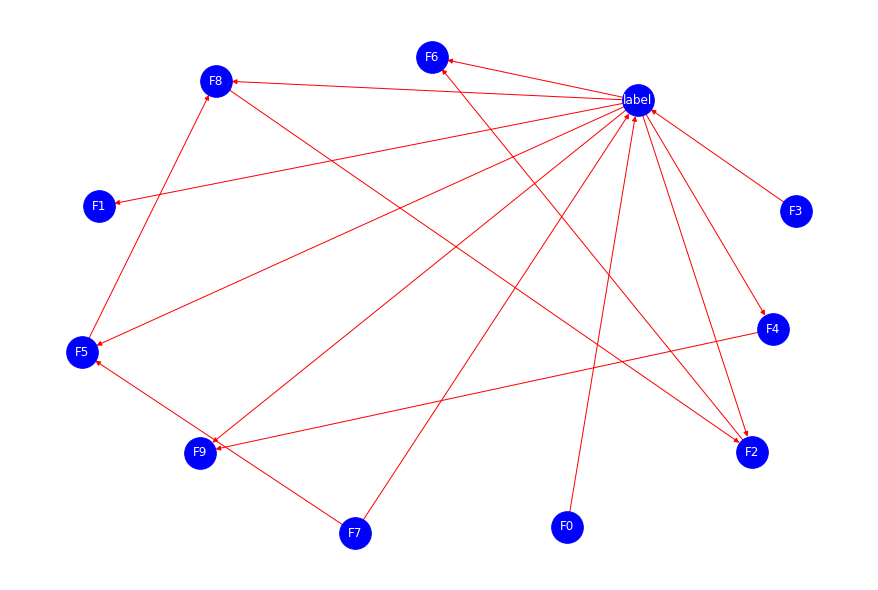

In [14]:
data = np.random.randint(0, 2, size=(5000, 10))
label = data.sum(axis=1)
test_data = np.random.randint(0, 2, size=(5000, 10))
model.bn.fit(data, label=label, sign_level=0.01)

In [18]:
model.svm.fit([[1,2], [0,0]], [1,0])
model.svm.predict_scores([[0,0]])

[LibSVM]

array([-0.67488419])